## Importing libraries and csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

Importing to dataframe from csv

In [2]:
raw_df = pd.read_csv("./data/raw.csv", index_col=0)
finished_df = pd.read_csv("./data/finished.csv", index_col=0)
unfinished_df = pd.read_csv("./data/unfinished.csv", index_col=0)

Let's look at the columns available

In [3]:
raw_df.columns

Index(['Assignment 1', 'Assignment 2', 'Quiz1', 'Mid Sem', 'Quiz2', 'End Exam',
       'Weighted Total', 'Grade', 'Branch', 'Is Dual Degree'],
      dtype='object')

Note from privacy.py: The csvs have been stripped of personal information like name, email. Marks were converted to float and erronous rows were removed.

In [4]:
raw_df.dtypes

Assignment 1      float64
Assignment 2      float64
Quiz1             float64
Mid Sem           float64
Quiz2             float64
End Exam          float64
Weighted Total    float64
Grade              object
Branch             object
Is Dual Degree       bool
dtype: object

And the same for `finished_df` and `unfinished_df`

***
## Grade distribution

In [5]:
raw_df['Grade'].value_counts()

A-    82
B     63
B-    29
A     18
C     16
D      8
C-     6
XD     3
F      3
XA     3
Name: Grade, dtype: int64

The most common grade is A- and the least common grade is F (X grades are not yet finalised)

***
Making a categorical for grades and sorting in order so that graphs are in correct order of grades

In [6]:
raw_df.Grade = pd.Categorical(values=raw_df.Grade, categories=['A', 'A-', 'B', 'B-', 'C', 'C-', 'D', 'F', 'XA', 'XD'])
finished_df.Grade = pd.Categorical(values=finished_df.Grade, categories=['A', 'A-', 'B', 'B-', 'C', 'C-', 'D', 'F'])
unfinished_df.Grade = pd.Categorical(values=unfinished_df.Grade, categories=['XA', 'XD'])
raw_df.sort_values(['Grade'], inplace=True)
finished_df.sort_values(['Grade'], inplace=True)
unfinished_df.sort_values(['Grade'], inplace=True)

### Grade Distribution (By Count)

<AxesSubplot: xlabel='Grade', ylabel='Count'>

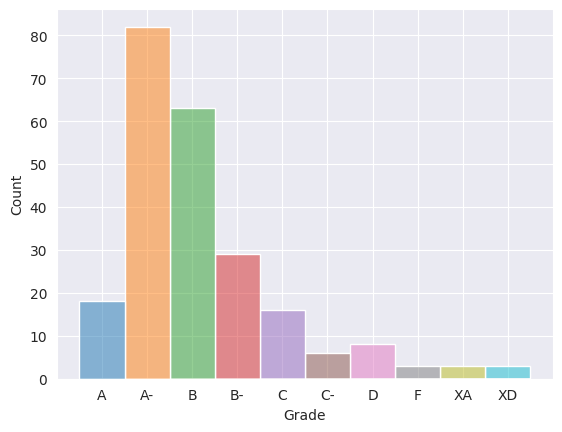

In [7]:
sns.histplot(data=raw_df, x='Grade', hue='Grade', legend=False)

### Grade Distribution (By Percent)

<AxesSubplot: xlabel='Grade', ylabel='Percent'>

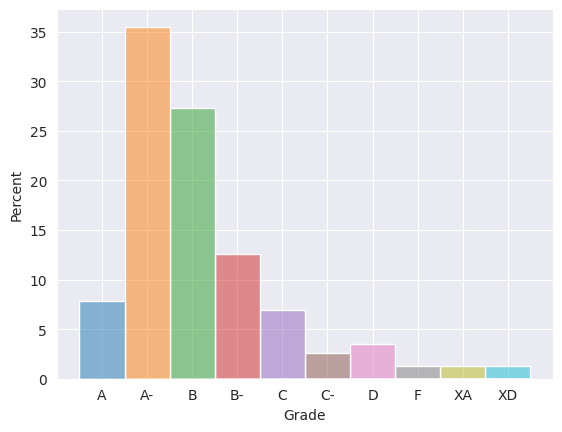

In [8]:
sns.histplot(data=raw_df, x='Grade', stat='percent', hue='Grade', legend=False)

***

## Weighted Total

### Weighted Total Statistics

In [9]:
raw_df['Weighted Total'].describe()

count    231.000000
mean      74.604241
std       13.708228
min       28.583333
25%       68.182500
50%       77.710000
75%       84.626500
max       96.550000
Name: Weighted Total, dtype: float64

Making a scatterplot on weighted total and categorising based on branch. The x axis label is index since there is no other candidate key. Considers only those with finalised grades

[Text(0.5, 0, 'Index')]

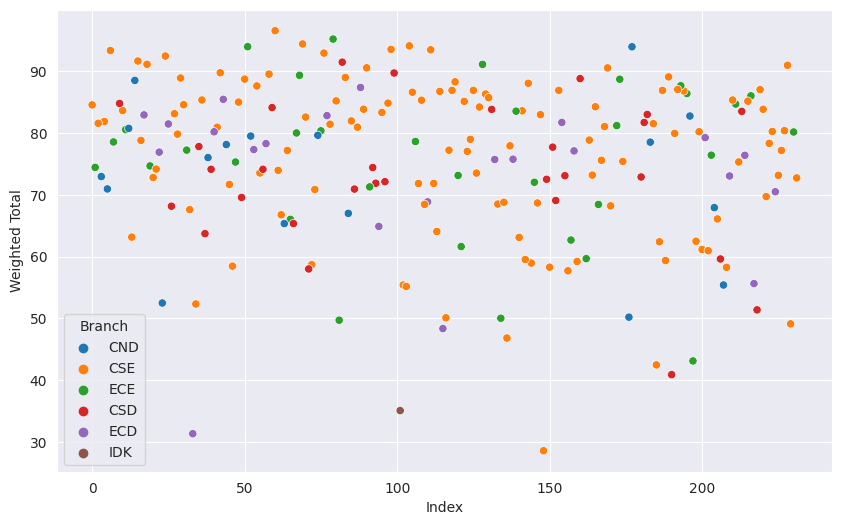

In [10]:
plt.figure(figsize=(10, 6))
total_scatter_plot = sns.scatterplot(data = finished_df, x=finished_df.index ,y='Weighted Total', hue='Branch')
total_scatter_plot.set(xlabel = "Index")

There is one branch whose code I did not recognise, and the label for that branch has been set to 'IDK' and the same will be used further.  
Let's look at some statistics for the weighted total for those who have confirmed grades.  

In [11]:
finished_df['Weighted Total'].describe()

count    225.000000
mean      75.428764
std       12.826397
min       28.583333
25%       68.675000
50%       78.125000
75%       84.783333
max       96.550000
Name: Weighted Total, dtype: float64

Let's make a graph to plot the mean weighted total per branch.

[Text(0, 0.5, 'Average Weighted Total')]

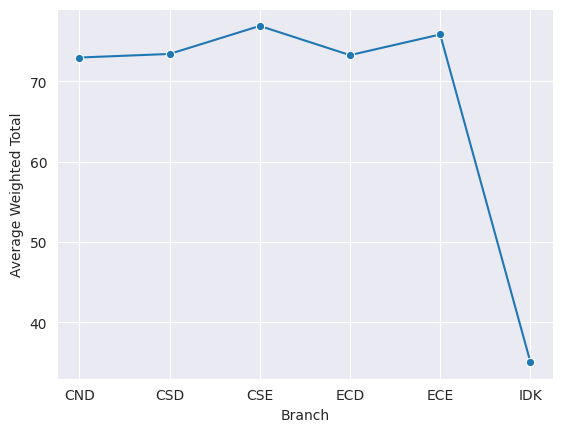

In [12]:
finished_grouped_df = finished_df.groupby(['Branch'])['Weighted Total']
lineplot = sns.lineplot(x='Branch', y='Weighted Total', data=finished_df.groupby('Branch')['Weighted Total'].mean().to_frame(), marker="o", legend=True)
lineplot.set(ylabel="Average Weighted Total")

In [24]:
finished_df[finished_df.Branch == 'IDK']['Grade'].count()

1

CSE has the highest mean weighted total and ECD has the lowest. IDK branch can be ignored since there is only a single student. The same statistics in tabular form: 

In [13]:
finished_grouped_df.mean()

Branch
CND    72.940353
CSD    73.385609
CSE    76.872108
ECD    73.237333
ECE    75.810131
IDK    35.078333
Name: Weighted Total, dtype: float64

***

## Grade cutoffs

Finding the list of unique grades

In [14]:
grades_list = list(raw_df['Grade'].unique())
grades_list

['A', 'A-', 'B', 'B-', 'C', 'C-', 'D', 'F', 'XA', 'XD']

Finding the max and min weighted total for each grade

In [15]:
for grade in grades_list:
    weighted_totals = list(raw_df[raw_df.Grade == grade]['Weighted Total'].sort_values())
    print(f"{grade} range is {weighted_totals[0]} to {weighted_totals[-1]}")

    # print(f"{grade} range is {list(raw_df[raw_df.Grade == grade]['Weighted Total'].sort_values().head(1))[0]} to {list(raw_df[raw_df.Grade == grade]['Weighted Total'].sort_values().tail(1))[0]}")

A range is 90.537 to 96.55
A- range is 73.13333333333334 to 89.75
B range is 70.49333333333334 to 79.936
B- range is 60.95 to 69.712
C range is 55.16666666666666 to 59.66666666666666
C- range is 50.022 to 52.486
D range is 40.89266666666667 to 62.47833333333334
F range is 28.583333333333336 to 35.07833333333333
XA range is 30.1 to 54.61
XD range is 40.02666666666666 to 55.35


Plotting the cutoffs as a boxplot. The diamonds represent anomalies. Immediately we notice two anomalies. There is a student with grade A- but weighted total in the 70s, which should be B. This could be due to wrong entry of marks for this student. There is also a student with grade D but weighted total in the 60s, which should have been a B-. This could be because of an error in entry or because of grade drops due to low attendance.

<AxesSubplot: xlabel='Weighted Total', ylabel='Grade'>

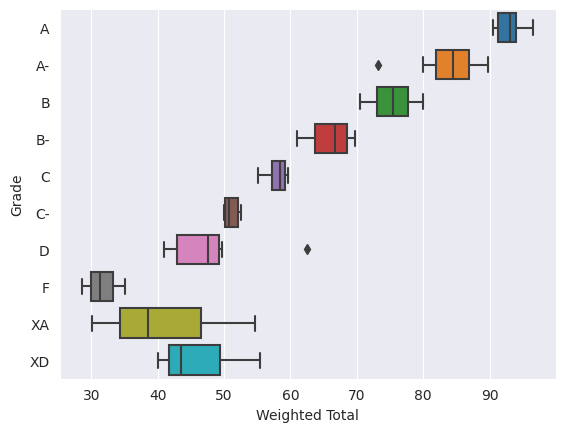

In [16]:
sns.boxplot(data=raw_df, x='Weighted Total', y='Grade')

***

## Average Grade

In [17]:
grades_dict = raw_df['Grade'].value_counts().to_dict()

In [18]:
raw_df['Grade'].mode()

0    A-
Name: Grade, dtype: category
Categories (10, object): ['A', 'A-', 'B', 'B-', ..., 'D', 'F', 'XA', 'XD']

### Grade for average weighted total: A-
(from the plot above)

***
## Grade distribution by branch
(Removing unknown branch with single student and all X grades)

<AxesSubplot: xlabel='Grade', ylabel='Percent'>

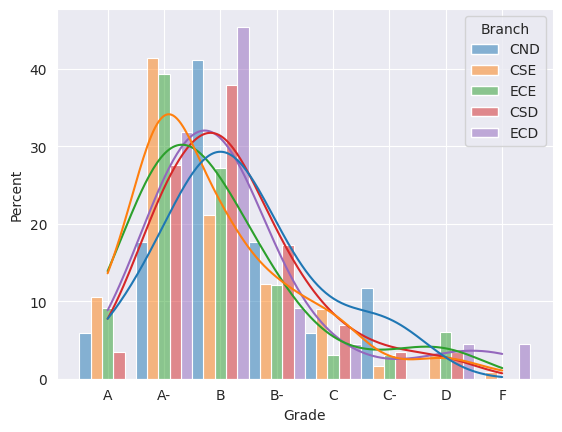

In [19]:
# for branch in list(raw_df.Branch.unique()):
current_batch_df = finished_df[finished_df.Branch != 'IDK']
sns.histplot(data=current_batch_df, x='Grade', stat='percent', hue='Branch', legend=True, multiple='dodge', common_norm=False, kde=True)

<AxesSubplot: xlabel='Weighted Total', ylabel='Percent'>

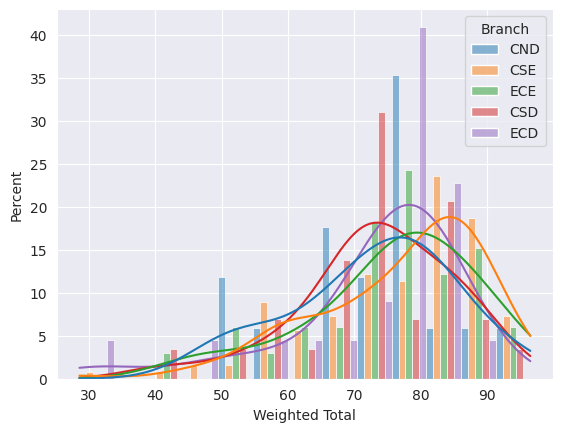

In [20]:
sns.histplot(data=current_batch_df, x='Weighted Total', stat='percent', hue='Branch', legend=True, multiple='dodge', common_norm=False, kde=True)

Finding per branch statistics for grade distribution (does not include X grades)

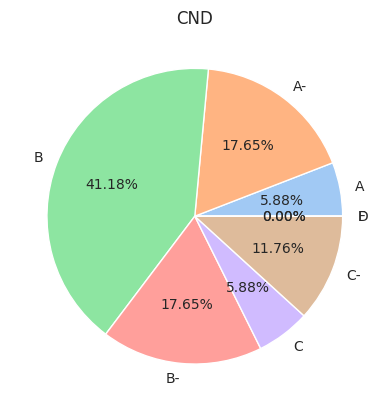

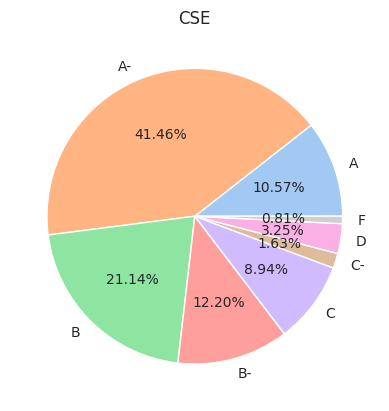

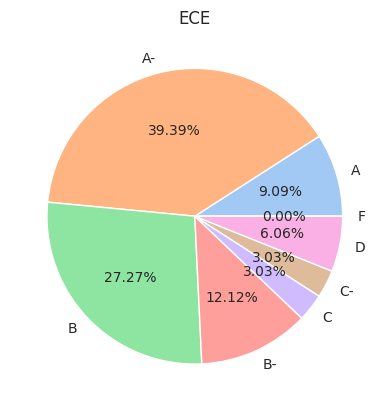

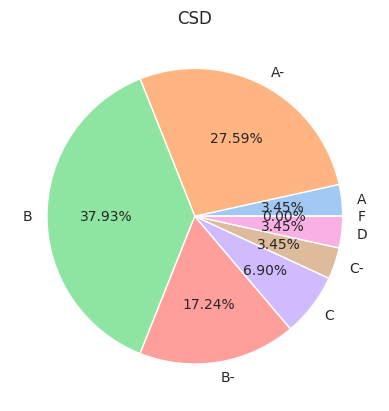

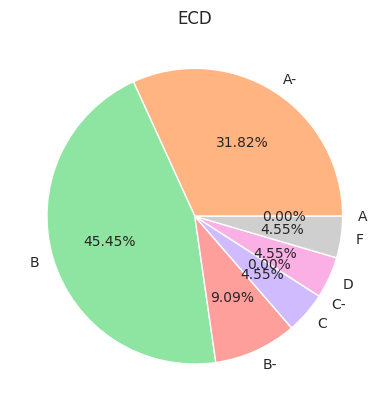

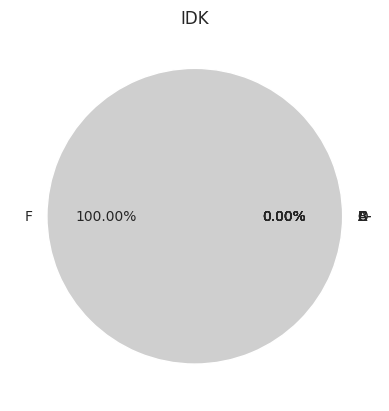

In [21]:
for branch in list(finished_df.Branch.unique()):
    branch_dict = finished_df[finished_df.Branch == branch].groupby('Grade')['Weighted Total'].count().to_dict()
    plt.pie(list(branch_dict.values()), labels=list(branch_dict.keys()), autopct="%.2f%%", colors=sns.color_palette('pastel'))
    plt.title(branch)
    plt.show()

***

## Dual Degree Stats

Weighted total for dual degree students vs single degree students (individual normalisation)

<AxesSubplot: xlabel='Weighted Total', ylabel='Percent'>

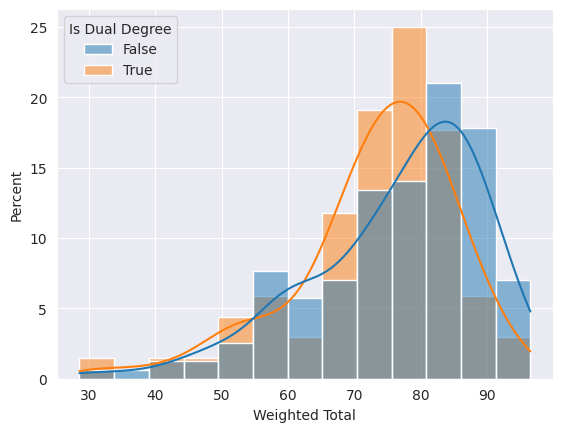

In [22]:
sns.histplot(data=finished_df, x='Weighted Total', stat='percent', common_norm=False, hue='Is Dual Degree', multiple='layer', kde=True)

Grade distribution for dual degree vs single degree students (individual normalisation)

<AxesSubplot: xlabel='Grade', ylabel='Percent'>

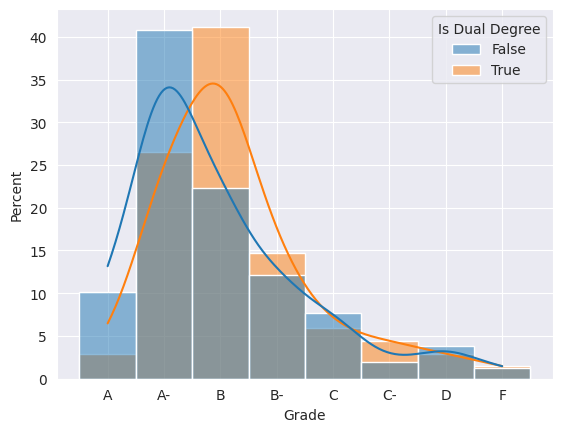

In [23]:
sns.histplot(data=finished_df, x='Grade', stat='percent', common_norm=False, hue='Is Dual Degree', multiple='layer', kde=True)

It seems that single degree students have performed better than dual degree students.

***